In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

warnings.filterwarnings("ignore")


### Importing and checking data

In [2]:
#importing the data
df=pd.read_csv('student-mat.csv',sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#creating a correlation matrix to understand the correlation between the features
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


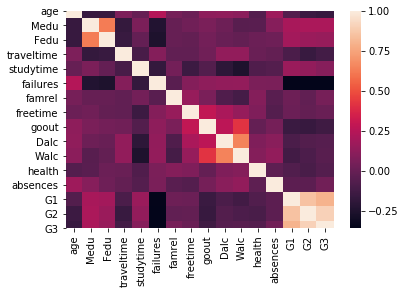

In [4]:
#using seaborn heatmap to analyse the correlation graphically
import seaborn as sns
sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns)

G3, apart from G1 and G2, is most correlated with Mother's Education(Medu), Father's Education(Fedu), and studytime.

In [5]:
#checking 
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
#checking data types of column values and presence of null values(if any)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

There are 33 columns in this data. These columns signify the following:

Bold:__school__ - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
Bold:__sex__ - student's sex (binary: 'F' - female or 'M' - male)
Bold:__age__ - student's age (numeric: from 15 to 22)
Bold:__address__ - student's home address type (binary: 'U' - urban or 'R' - rural)
Bold:__famsize__ - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
Bold:__Pstatus__ - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Bold:__Medu__ - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
Bold:__Fedu__ - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
Bold:__Mjob__ - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Bold:__Fjob__ - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
Bold:__reason__ - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
Bold:__guardian__ - student's guardian (nominal: 'mother', 'father' or 'other')
Bold:__traveltime__ - home to school travel time (numeric: 1 - 1 hour)
Bold:__studytime__ - weekly study time (numeric: 1 - 10 hours)
Bold:__failures__ - number of past class failures (numeric: n if 1<=n<3, else 4)
Bold:__schoolsup__ - extra educational support (binary: yes or no)
Bold:__famsup__ - family educational support (binary: yes or no)
Bold:__paid__ - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
Bold:__activities__ - extra-curricular activities (binary: yes or no)
Bold:__nursery__ - attended nursery school (binary: yes or no)
Bold:__higher__ - wants to take higher education (binary: yes or no)
Bold:__internet__ - Internet access at home (binary: yes or no)
Bold:__romantic__ - with a romantic relationship (binary: yes or no)
Bold:__famrel__ - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
Bold:__freetime__ - free time after school (numeric: from 1 - very low to 5 - very high)
Bold:__goout__ - going out with friends (numeric: from 1 - very low to 5 - very high)
Bold:__Dalc__ - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
Bold:__Walc__ - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
Bold:__health__ - current health status (numeric: from 1 - very bad to 5 - very good)
Bold:__absences__ - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

Bold:__G1__ - first period grade (numeric: from 0 to 20)
Bold:__G2__ - second period grade (numeric: from 0 to 20)
Bold:__G3__ - final grade (numeric: from 0 to 20, output target)

### Exploratory Data Analysis

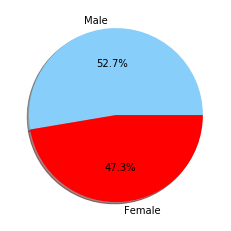

In [7]:
#distribution of female to male in the given data
total_count=df['sex'].value_counts()
plt.pie(x=total_count,colors=['lightskyblue','red'], labels=['Male','Female'],autopct='%1.1f%%',shadow=True)
plt.show()

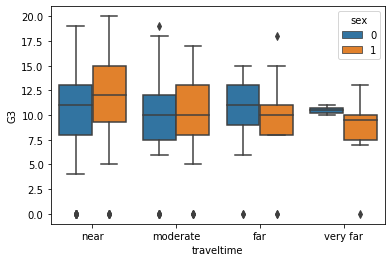

In [37]:
#plot on traveltime vs G3 based on sex 
g=sns.boxplot(x='traveltime',y='G3',data=df,hue='sex')
g.set(xticklabels=['near','moderate','far','very far'])
plt.show()

Males with smaller traveltime scored better than those who required more time to travel. The distribution in case of females is less as the travel time increases.

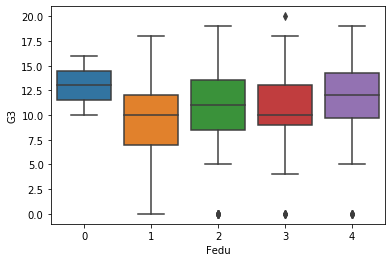

In [9]:
#Father's education vs final score
sns.boxplot(x='Fedu',y='G3',data=df)

Interesting plot here,as those students score higher whose their Father's education is lower, when compared to those whose Fathers have more education

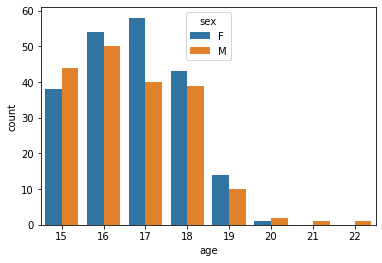

In [10]:
#countplot of age based on sex
sns.countplot('age',hue='sex',data=df)

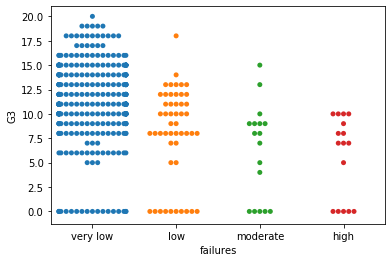

In [11]:
#failures vs final score
g=sns.swarmplot(x='failures',y='G3',data=df)
g.set(xticklabels=['very low','low','moderate','high','very high'])
plt.show()

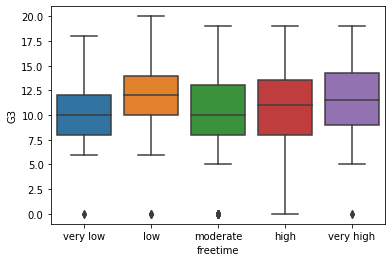

In [12]:
#freetime vs final Score
g=sns.boxplot(x='freetime',y='G3',data=df)
g.set(xticklabels=['very low','low','moderate','high','very high'])
plt.show()

Contrary to popular believe, students with more free time have better score than those with less free time.

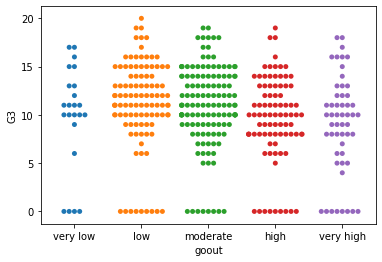

In [13]:
#outing vs final score
g=sns.swarmplot(x='goout',y='G3',data=df)
g.set(xticklabels=['very low','low','moderate','high','very high'])
plt.show()

Most of the students, according to the plot, go out frequently,and still manage to score good marks(above average)

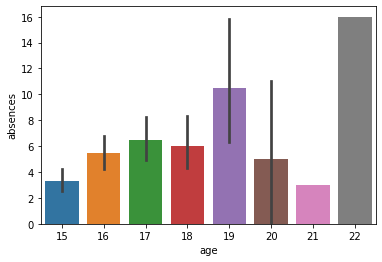

In [14]:
sns.barplot(x='age',y='absences',data=df)

The absences increases steadily till 19, but reduce by 20 and 21. By the time they are 22, they lose all hope and dont bother
coming alltogether

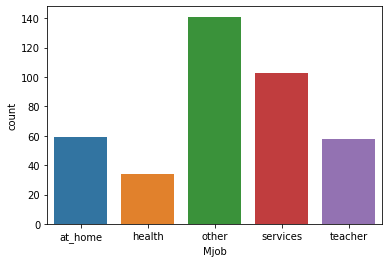

In [15]:
#mother's job plot
sns.countplot('Mjob',data=df)

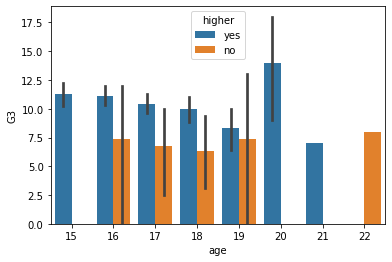

In [16]:
#plot of age vs final score based on pursuing higher education
sns.barplot(x='age',y='G3',data=df,hue='higher')

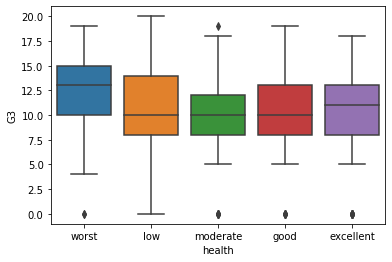

In [17]:
#health vs final score barplot
g=sns.boxplot(x='health',y='G3',data=df)
g.set(xticklabels=['worst','low','moderate','good','excellent'])
plt.show()

Interestingly, the students with worst health score more than those with better health status

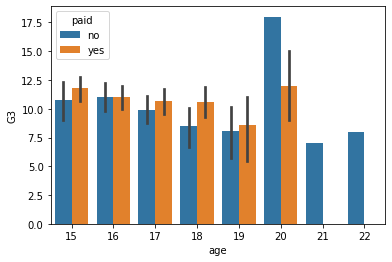

In [18]:
#countplot of age vs final score based on being paid
sns.barplot(x='age',y='G3',data=df,hue='paid')

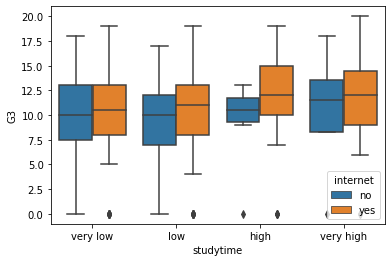

In [19]:
#boxplot of studytime vs final score based on internet usage
g=sns.boxplot(x='studytime',y='G3',hue='internet',data=df)
g.set(xticklabels=['very low','low','high','very high'])
plt.show()

Students who study more and habve internet usage have better final score, as expected

<function matplotlib.pyplot.show(*args, **kw)>

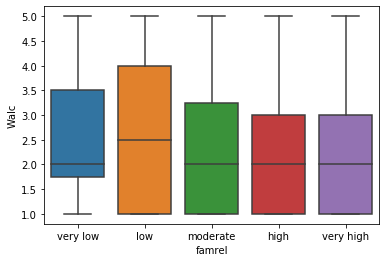

In [20]:
g=sns.boxplot(x='famrel',y='Walc',data=df)
g.set(xticklabels=['very low','low','moderate','high','very high'])
plt.show

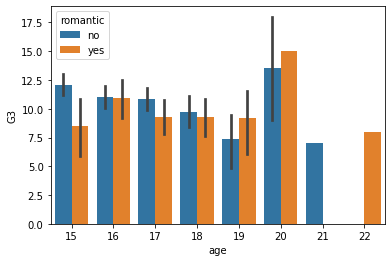

In [21]:
#age vs final score based on romantic life
sns.barplot(x='age',y='G3',hue='romantic',data=df)

Students with romantic relationships score less than those without, with age of 20 being an exception. The students mature by 20
and handle both the things well.

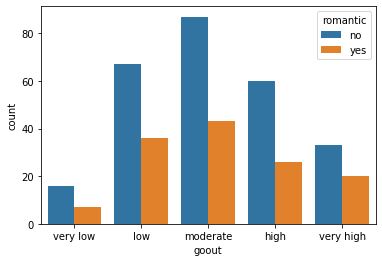

In [22]:
g=sns.countplot(x='goout',hue='romantic',data=df)
g.set(xticklabels=['very low','low','moderate','high','very high'])
plt.show()

### Model Preparation

Most of the students who go out are very likely to be in a romantic relationship

In [23]:
#extracting major features only
df_features=df[['G1','G2','Medu','Fedu','studytime']]
df_features.head()
df_label=df[['G3']]

In [24]:
#getting values as numpy arrays for splitting
X=df_features.values
y=df_label.values

In [25]:
#splitting the X and y values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [26]:
#performing the regression on various models and storing the scores
scores={}
def classifier():
    dict_models={
        'Linear Regression':LinearRegression(),
        'Support Vector Machine':SVR(kernel='linear',degree=1),
        'Decision Tree':DecisionTreeRegressor(criterion='mae'),
        'Random Forest':RandomForestRegressor(n_estimators=150,criterion='mse',verbose=0)
    }
    X_train.shape
    y_train.shape
    
    for key,value in dict_models.items():
        regression=value.fit(X_train,y_train)
        score=cross_val_score(regression,X,y,scoring='neg_mean_squared_error')
        score=np.sqrt(-score.mean())
        scores[key]=score
        print(
            f'Model Name: {key},RMSE score: {(score.mean())}')

In [27]:
classifier()

Model Name: Linear Regression,RMSE score: 1.9618580431363846
Model Name: Support Vector Machine,RMSE score: 2.0092046787061633
Model Name: Decision Tree,RMSE score: 2.7199450850748415
Model Name: Random Forest,RMSE score: 2.221040137168908


In [28]:
#scaling the values(although it doesn't change the rmse)
from sklearn.preprocessing import MinMaxScaler
sc_s=MinMaxScaler()
X_train=sc_s.fit_transform(X_train)
X_test=sc_s.transform(X_test)

In [29]:
classifier()

Model Name: Linear Regression,RMSE score: 1.9618580431363846
Model Name: Support Vector Machine,RMSE score: 2.0092046787061633
Model Name: Decision Tree,RMSE score: 2.628350784827106
Model Name: Random Forest,RMSE score: 2.223641872366748


In [30]:
#labelling the categorical column values of the dataframe
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=LabelEncoder().fit_transform(df[column])

In [31]:
#extracting all the features this time for evaluation
#Only Random Forest and Decision Tree are used because others require one-hot-encoding, which we will cover
#in future notebooks
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [32]:
#Using Random Forest Regressor
new=RandomForestRegressor()
model=new.fit(X_train,y_train)
score=cross_val_score(model,X,y,scoring='neg_mean_squared_error')
score=np.sqrt(-score.mean())
scores['Random Forest Labled']=score

In [33]:
#Using Decision Tree Regressor
test=DecisionTreeRegressor()
model=new.fit(X_train,y_train)
score=cross_val_score(model,X,y,scoring='neg_mean_squared_error')
score=np.sqrt(-score.mean())
scores['Decision Tree Labled']=score

### Visualing and comparing Models

In [34]:
#Converting scores to datafram
scores=(pd.Series(scores)).to_frame()

In [35]:
#renaming the column names
scores=scores.rename(columns={0:'score'})
scores

,score
Linear Regression,1.961858
Support Vector Machine,2.009205
Decision Tree,2.628351
Random Forest,2.223642
Random Forest Labled,1.808345
Decision Tree Labled,1.835890


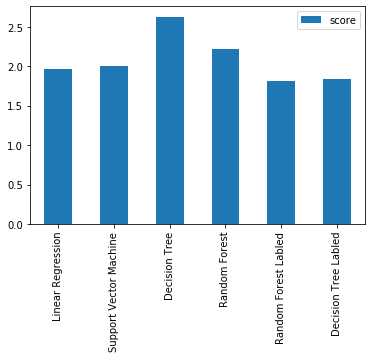

In [36]:
#plotting the scores of each model for better comparison
scores.plot(kind='bar')